In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [4]:
# Load the data
from tensorflow.keras.datasets import fashion_mnist
(X_train,y_train), (X_test,y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [5]:
# Check the shape of training and test dataset
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [6]:
# check the shape of first example
X_train[0].shape,y_train[0].shape

((28, 28), ())

In [7]:
# Lets see first eample and labels
print(f"Ther first example of dataset is {X_train[0]}")
print(f"the label of first example is:{y_train[0]}")

Ther first example of dataset is [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0  

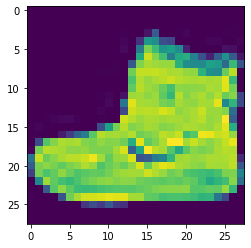

In [8]:
# Lets visualize the first example
plt.imshow(X_train[0])  # The label for first example is '9' which is ankle boot

Text(0.5, 1.0, 'T-shirt/top')

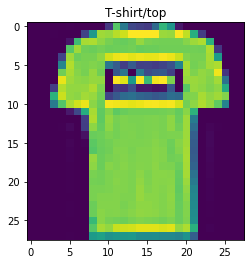

In [51]:
# Lets create a list to name each label in human understandable language
name_classes = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
# Lets see our second label
plt.imshow(X_train[1])
plt.title(name_classes[y_train[1]])

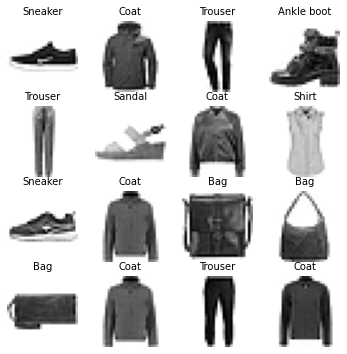

In [58]:
# Lets create a matrix of 5 by 5 showing random images of the example
import random
plt.figure(figsize=(6,6))
for i in range(16):
  plt.subplot(4,4,i+1)
  rand_index = random.choice(range(len(X_train)))
  plt.imshow(X_train[rand_index],cmap = plt.cm.binary)
  plt.title(name_classes[y_train[rand_index]],size = 10)
  plt.axis(False)

#### Lets create Model
Few things to keep in mind:
* If your output is in integer form use SparseCategoricalCrossentropy()
* If your label is one-hot encoded use CategoricalCrossentropy()
* Form multiclass classification use softmax function not sigmoid

In [11]:
# set the random seed
tf.random.set_seed(42)
# Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),  # Flatten the input shape from (28,28) to (none,784)
    tf.keras.layers.Dense(units = 4,activation = 'relu'),
    tf.keras.layers.Dense(units = 4,activation = 'relu'),
    tf.keras.layers.Dense(units = 10,activation = 'softmax')
])

In [12]:
# Compile the model
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(), 
    metrics = ['accuracy']
)

In [13]:
# Fit the model
non_norm_history = model.fit(
    X_train,y_train,epochs = 20,validation_data=(X_test,y_test)
)

Epoch 1/20
1875/1875 [==============================] - 9s 4ms/step - loss: 2.1627 - accuracy: 0.1629 - val_loss: 1.7874 - val_accuracy: 0.2104
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.7033 - accuracy: 0.2535 - val_loss: 1.6427 - val_accuracy: 0.2812
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6271 - accuracy: 0.2836 - val_loss: 1.6482 - val_accuracy: 0.2998
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6038 - accuracy: 0.2894 - val_loss: 1.5994 - val_accuracy: 0.2955
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 1.5967 - accuracy: 0.2955 - val_loss: 1.5777 - val_accuracy: 0.3137
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5882 - accuracy: 0.3018 - val_loss: 1.5767 - val_accuracy: 0.3054
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5809 - accuracy: 0.3118 - val_loss: 1.5741 - val_accuracy:

In [14]:
# Evaluate the model
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 1.0166 - accuracy: 0.5806


[1.0165904760360718, 0.5806000232696533]

In [15]:
X_train.min(),X_train.max()

(0, 255)

In [16]:
# Lets normalize our training and test data
X_train_norm = X_train/255
X_test_norm = X_test/255
X_train_norm[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [17]:
# Lets fit the above model on normalized data
norm_history = model.fit(X_train_norm,y_train,epochs = 20,validation_data=(X_test_norm,y_test))

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6039 - accuracy: 0.3905 - val_loss: 1.1832 - val_accuracy: 0.5170
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0332 - accuracy: 0.6034 - val_loss: 0.9465 - val_accuracy: 0.6540
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8764 - accuracy: 0.6607 - val_loss: 0.8569 - val_accuracy: 0.6781
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8181 - accuracy: 0.6807 - val_loss: 0.8481 - val_accuracy: 0.6891
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7904 - accuracy: 0.6970 - val_loss: 0.8000 - val_accuracy: 0.6981
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7525 - accuracy: 0.7248 - val_loss: 0.7795 - val_accuracy: 0.7279
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7269 - accuracy: 0.7393 - val_loss: 0.7590 - val_accuracy:

In [18]:
# Lets visualize the fitting on normalized data and non-normalized data in tabular form
print(pd.DataFrame(non_norm_history.history))
print(pd.DataFrame(norm_history.history))

        loss  accuracy  val_loss  val_accuracy
0   2.162653  0.162900  1.787427        0.2104
1   1.703345  0.253517  1.642717        0.2812
2   1.627115  0.283617  1.648178        0.2998
3   1.603833  0.289433  1.599396        0.2955
4   1.596683  0.295550  1.577727        0.3137
5   1.588224  0.301817  1.576665        0.3054
6   1.580864  0.311833  1.574101        0.2898
7   1.565019  0.322683  1.562556        0.3349
8   1.558499  0.332650  1.565876        0.3423
9   1.556195  0.330167  1.545308        0.3344
10  1.552899  0.328867  1.573828        0.3331
11  1.538774  0.340217  1.502281        0.3565
12  1.496366  0.356900  1.508163        0.3560
13  1.494106  0.365700  1.527052        0.3555
14  1.495313  0.369433  1.477836        0.3697
15  1.428273  0.400583  1.296203        0.4520
16  1.252124  0.453400  1.239016        0.4648
17  1.123604  0.528850  1.089865        0.5569
18  1.041087  0.563433  1.062591        0.5641
19  1.023940  0.572633  1.016590        0.5806
        loss 

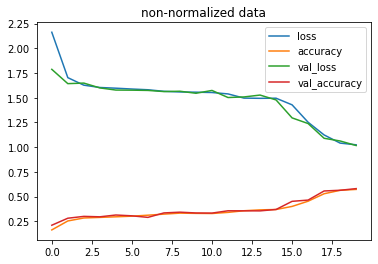

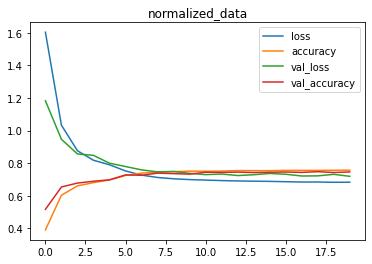

In [19]:
# Lets visualize plt of the normalized and non-normalized modle history
pd.DataFrame(non_norm_history.history).plot(title = 'non-normalized data')

pd.DataFrame(norm_history.history).plot(title = 'normalized_data')

##### Find the best learning rate

In [20]:
# Create anothe model with callback
# set random seed
tf.random.set_seed(42)
# Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(units = 4,activation = 'relu'),
    tf.keras.layers.Dense(units = 4,activation = 'relu'),
    tf.keras.layers.Dense(units = 10,activation = 'softmax')
])

In [21]:
# Compile the model
model_1.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

In [22]:
# scedula the callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3*10**(epoch/20))
# Fit the model
find_lr_history = model_1.fit(
    X_train_norm,y_train,epochs = 20, validation_data=(X_test_norm,y_test), callbacks=[lr_scheduler]
)

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617 - lr: 0.0010
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808 - lr: 0.0011
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770 - lr: 0.0013
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871 - lr: 0.0014
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913 - lr: 0.0016
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940 - lr: 0.0018
Epoch 7/20
1875/1875 [==============================] - 4s

Text(0.5, 1.0, 'Loss vs. Learning rate')

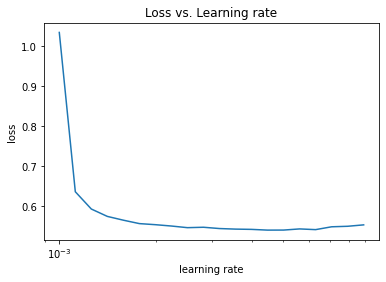

In [23]:
# lets plot the loss vs.learning rate
lrs = 1e-3*10**(tf.range(20)/20)
plt.semilogx(lrs,find_lr_history.history['loss'])
plt.xlabel("learning rate")
plt.ylabel("loss")
plt.title("Loss vs. Learning rate")

##### we can see loss is decreasing much faster when learning rate is around 1e-3 

In [24]:
# lets crate a model with the learning rate 1e-3
# set random seed
tf.random.set_seed(42)
# Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(units = 4,activation = 'relu'),
    tf.keras.layers.Dense(units = 4,activation = 'relu'),
    tf.keras.layers.Dense(units = 10,activation = 'softmax')
])

In [25]:
# Compile the model
model_2.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(lr = 0.001),
    metrics = ['accuracy']
)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [26]:
# Fit the model
model_2.fit(X_train_norm,y_train,epochs = 20,validation_data=(X_test_norm,y_test))

Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

In [27]:
# Make some predictions 
y_probs = model_2.predict(X_test_norm)  # y_probs stand for probabilitistic prediction
y_probs


313/313 [==============================] - 0s 1ms/step


array([[8.5629961e-11, 3.5361622e-13, 2.6633725e-05, ..., 9.1868833e-02,
        4.0605268e-03, 8.0787349e-01],
       [3.4278653e-06, 1.2899314e-16, 9.5989150e-01, ..., 1.1383622e-28,
        6.3272531e-04, 4.4789129e-08],
       [6.1062819e-05, 9.9657661e-01, 4.3866635e-08, ..., 7.3236611e-18,
        5.4811181e-08, 4.9224761e-14],
       ...,
       [7.8579508e-02, 2.2294877e-05, 1.4033380e-01, ..., 2.9533631e-20,
        1.1197231e-01, 4.7599782e-09],
       [3.3110991e-05, 9.9301308e-01, 2.3392221e-07, ..., 9.3986513e-15,
        8.1592623e-07, 1.2158927e-11],
       [7.9816118e-08, 7.7578161e-10, 1.6470597e-04, ..., 4.3826256e-02,
        1.5162554e-03, 3.9120521e-02]], dtype=float32)

In [28]:
# Lest see our first probabilitistic prediction
y_probs[0]   # we can see that 9th index has higher probability 

array([8.5629961e-11, 3.5361622e-13, 2.6633725e-05, 4.6356284e-08,
       5.0949748e-05, 9.6119456e-02, 8.1778026e-08, 9.1868833e-02,
       4.0605268e-03, 8.0787349e-01], dtype=float32)

In [29]:
# Lets check what is at 9th index in class
name_classes[9]

'Ankle boot'

In [30]:
# Convert all probability in integer form
y_pred = tf.argmax(y_probs,axis = 1)
y_pred

<tf.Tensor: shape=(10000,), dtype=int64, numpy=array([9, 2, 1, ..., 3, 1, 5])>

In [31]:
# Lets check our first prediction
y_pred[0]

<tf.Tensor: shape=(), dtype=int64, numpy=9>

In [32]:
# check test labels and predictions are same for firt 10 items
y_pred[:10] == y_test[:10]  # all are true means prediction is same as label


<tf.Tensor: shape=(10,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])>

In [54]:
# Create confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true = y_test,y_pred = y_pred)

array([[696,   8,  25,  87,   9,   5, 160,   0,  10,   0],
       [  2, 939,   2,  35,   9,   0,  13,   0,   0,   0],
       [ 19,   2, 656,  10, 188,   0, 110,   0,  15,   0],
       [ 39,  10,  10, 819,  55,   0,  47,   1,  19,   0],
       [  0,   0,  95,  23, 800,   0,  73,   0,   7,   2],
       [  0,   0,   1,   0,   0, 894,   0,  60,   7,  38],
       [106,   4, 158,  57, 159,   1, 499,   0,  16,   0],
       [  0,   0,   0,   0,   0,  31,   0, 936,   0,  33],
       [  4,   1,  38,  15,   8,  12,   9,   5, 906,   2],
       [  0,   0,   1,   0,   2,  15,   0,  51,   1, 930]])

In [55]:
# prettify the confusion matrix 
import itertools
# create a function for confusion matrix
def make_confusion_matrix(y_test,y_pred,classes = None,figsize = (10,10)):
  cm = confusion_matrix(y_test,y_pred)
  cm_norm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis] # normalize our confusion matrix
  n_classes = cm.shape[0]
  # Lets prettify it
  fig,ax = plt.subplots(figsize=figsize)
  # creat a matrix plot
  cax = ax.matshow(cm,cmap=plt.cm.Blues)
  fig.colorbar(cax)
  # Set xaxis labels to bottom
  ax.xaxis.set_label_position('bottom')
  ax.xaxis.tick_bottom()
  # Adjust label size
  ax.yaxis.label.set_size(10)
  ax.xaxis.label.set_size(10)
  ax.title.set_size(10)

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  # Label the axes
  ax.set(title = 'Confusion Matrix',
        xlabel = 'Predicted label',
        ylabel = 'True value',
        xticks = np.arange(n_classes),
        yticks = np.arange(n_classes),
        xticklabels = labels,
        yticklabels  = labels)
  # Set threshold for different colors
  threshold = (cm.max()+cm.min())/2
  # plot the text on each cell
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i, f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
            horizontalalignment = 'center',
            color = 'white' if cm[i,j]>threshold else 'black',
            size = 10)

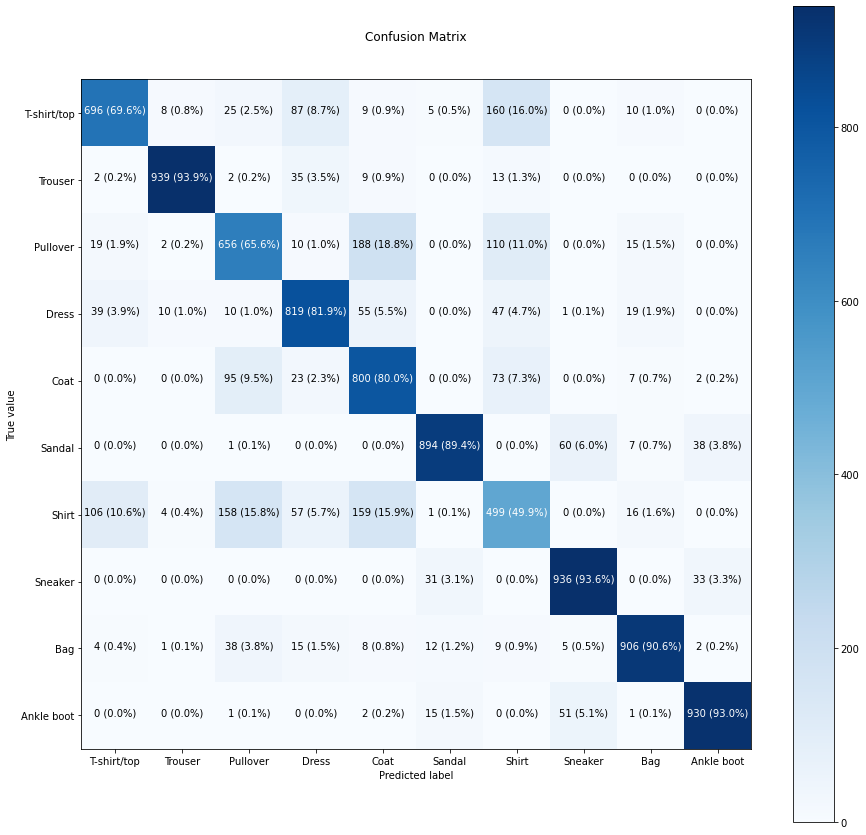

In [56]:
# Lets visualize confusion matrix 
make_confusion_matrix(y_test,y_pred,name_classes,figsize = (15,15))

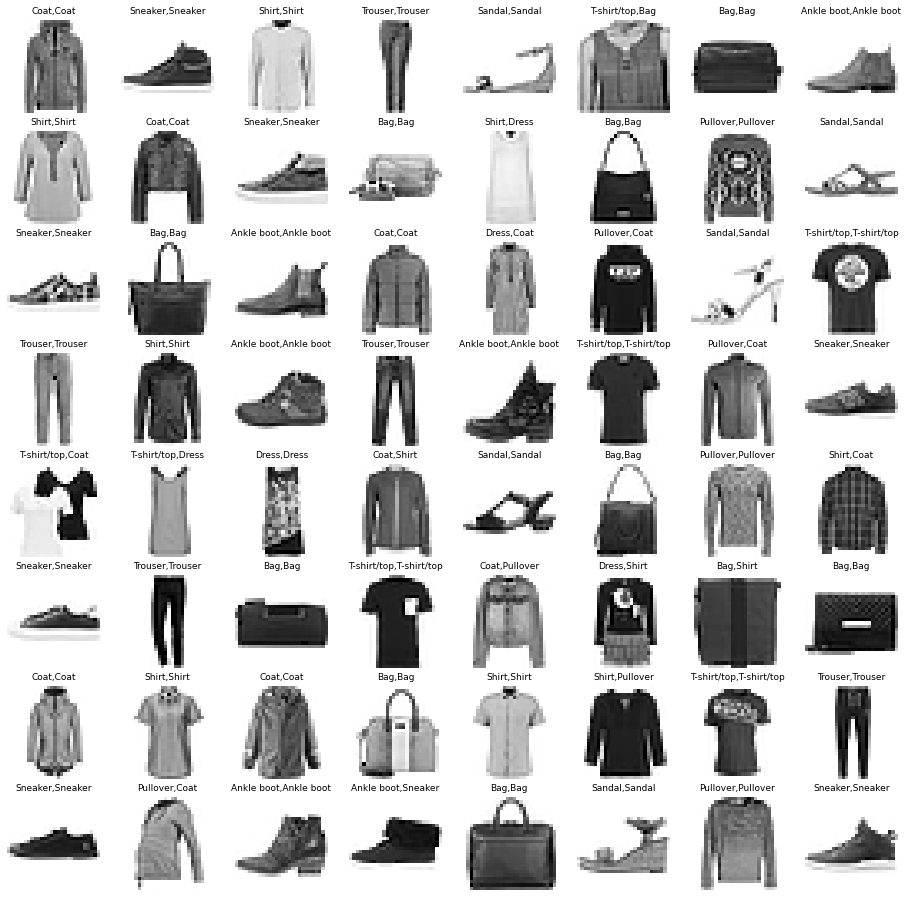

In [57]:
# Lets see random 64 images of our test lables and predictions  (Left lable: true label and right label: predicted label)
import random 
plt.figure(figsize = (16,16))
fontsize = 9
for i in range(64):
  rand_index = random.choice(range(len(X_test)))
  ax = plt.subplot(8,8,i+1)
  plt.imshow(X_test[rand_index],cmap = plt.cm.binary)
  ax.set_title(f"{name_classes[y_test[rand_index]]},{name_classes[y_pred[rand_index]]}",fontdict={'fontsize':fontsize})
  plt.axis(False)